In [1]:
import pandas as pd
# from zipfile import ZipFile
# import os
import re
# import json
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
# import wordcloud
# from sklearn.preprocessing import OneHotEncoder
# import matplotlib.animation as animation
import nltk
from nltk.corpus import wordnet
from ast import literal_eval
from IPython.display import Image, display
from myfunctions import *
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
sns.set()

[nltk_data] Downloading package wordnet to /Users/aditya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aditya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aditya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/aditya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aditya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aditya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
datadf = pd.read_csv('All Data/Raw Journey Data/Until16May2020(all jsons to csv).csv')
datadf.rename(columns={'Unnamed: 0':'id'}, inplace=True)
datadf.set_index('id', inplace=True)
datadf.head(2)

,text,date_modified,date_journal,address,lat,lon,posture,timezone,favourite,weather,photos,tags,no_punc,is_personal,cleaned_text
id,,,,,,,,,,,,,,,
1439137473084-3fc756cc3f8d6404,"The first thing I saw ,when I entered her room...",2017-08-31 01:44:57,2015-08-09 11:24:33,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],"['personal', 'published']",The first thing I saw when I entered her room ...,1,"The first thing I saw , when I entered her roo..."
1439198245820-3fda14add91e3f20,Philosophy\n\n\n\n\n\n\nIt surprises me..hw u ...,2017-08-22 22:08:05,2015-08-10 04:17:25,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['personal'],Philosophy It surprises me hw u so effortlessl...,1,Philosophy It surprises me ... hw you so effor...


In [3]:
emotions = pd.read_csv('All Data/Raw Journey Data/EmotionsUntil16May2020.csv')
emotions.set_index('id', inplace=True)
emotions.emotion = [literal_eval(x) for x in emotions.emotion]
emotions.head()

,emotion,updated_text
id,,
1489286478583-3f84a9e0d2133740,[9],NaN
1518813865424-3fe4c21bcde3e99d,[9],NaN
1530784913126-3fe6c3ee98b50803,[9],NaN
1533401601882-3fe712c016406108,[9],NaN
1534604687971-3fe6366d85a5db42,[9],NaN


In [4]:
labelled = emotions[[x!= [0] for x in emotions.emotion]]
labelled = labelled.merge(datadf, on='id', how='left')
labelled = labelled[['emotion','cleaned_text','date_journal']]
labelled

,emotion,cleaned_text,date_journal
id,,,
1489286478583-3f84a9e0d2133740,[9],MY BOOK IBD KHUSHBOO - MAHEK SHANKAR - VISHNU ...,2017-03-11 20:41:18
1518813865424-3fe4c21bcde3e99d,[9],Important is so relative . You can be imoortan...,2018-02-16 14:44:25
1530784913126-3fe6c3ee98b50803,[9],Podcast : Revisionist History Episode : Malcol...,2018-07-05 05:01:53
1533401601882-3fe712c016406108,[9],Everytime I try to sleep when I am not sleepy ...,2018-08-04 11:53:21
1534604687971-3fe6366d85a5db42,[9],I write for materialization and evidence .,2018-08-18 10:04:47
...,...,...,...
1454194350747-3fd71179ceec9806,"[9, 2]",Short film ... Guy girl talking ... Guy perspe...,2016-01-30 16:52:30
1515710823489-3fd2f847ef4d6a8a,"[9, 3]",Nights smell different,2018-01-11 16:47:03
1522402705316-3fe62e5a5629a958,"[9, 6]",I know the date . I see it in my phone . I kno...,2018-03-30 04:38:25


In [5]:
pos_labels = [3,4,8]
neg_labels = [1,2,5,6,7,12,16]
nrl_labels = [9,10,11,13,14,15]

In [6]:
def scale_down(list_item):
    if list_item in pos_labels:
        return (1)
    elif list_item in neg_labels:
        return (-1)
    else:
        return (0)

In [7]:
def pnr_labeller(lst):
    temp = [scale_down(x) for x in lst]
    net = sum(temp)
    if net>0:
        return ('p')
    elif net<0:
        return ('n')
    else:
        return ('r')
#     return (max(set(temp), key=temp.count)) #mode emotion

In [8]:
def mapper(label):
    dct = {
        1: 'Very Sad',
        2 : 'Sad',
        3 : 'Happy/relieved/content',
        4 : 'Very Happy',
        5 : 'Disgusted/Frustrated',
        6 : 'Fear',
        7 : 'Angry',
        8 : 'Inspired/Proud',
        9 : 'Emotionless/Observation',
        10: 'Surprised',
        11  :'Nostalgic',
        12 :'Jealous',
        13:  'Adrenaline',
        14 :'For Future/Determined',
        15 : 'Poetic',
        16 : 'Dissatisfied'
    }
    return(dct[label])

In [9]:
labelled['pnr_labels'] = labelled.emotion.apply(pnr_labeller)

In [10]:
labelled.cleaned_text.fillna('', inplace=True)
datadf.cleaned_text.fillna('', inplace=True)

In [11]:
labelled['primary_emotion'] = [mapper(each_list[0]) for each_list in labelled.emotion]
labelled

,emotion,cleaned_text,date_journal,pnr_labels,primary_emotion
id,,,,,
1489286478583-3f84a9e0d2133740,[9],MY BOOK IBD KHUSHBOO - MAHEK SHANKAR - VISHNU ...,2017-03-11 20:41:18,r,Emotionless/Observation
1518813865424-3fe4c21bcde3e99d,[9],Important is so relative . You can be imoortan...,2018-02-16 14:44:25,r,Emotionless/Observation
1530784913126-3fe6c3ee98b50803,[9],Podcast : Revisionist History Episode : Malcol...,2018-07-05 05:01:53,r,Emotionless/Observation
1533401601882-3fe712c016406108,[9],Everytime I try to sleep when I am not sleepy ...,2018-08-04 11:53:21,r,Emotionless/Observation
1534604687971-3fe6366d85a5db42,[9],I write for materialization and evidence .,2018-08-18 10:04:47,r,Emotionless/Observation
...,...,...,...,...,...
1454194350747-3fd71179ceec9806,"[9, 2]",Short film ... Guy girl talking ... Guy perspe...,2016-01-30 16:52:30,n,Emotionless/Observation
1515710823489-3fd2f847ef4d6a8a,"[9, 3]",Nights smell different,2018-01-11 16:47:03,p,Emotionless/Observation
1522402705316-3fe62e5a5629a958,"[9, 6]",I know the date . I see it in my phone . I kno...,2018-03-30 04:38:25,n,Emotionless/Observation


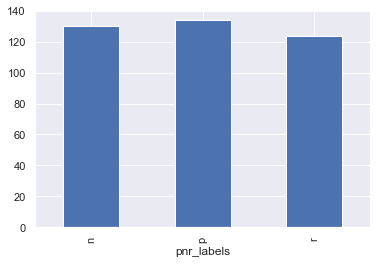

In [12]:
labelled.groupby('pnr_labels').cleaned_text.count().plot.bar(ylim=0)
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=2)
x_train_vectorized = vectorizer.fit_transform(labelled.cleaned_text)

In [15]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from scipy import sparse
clf = OneVsRestClassifier(SVC()).fit(x_train_vectorized, labelled.primary_emotion)

In [16]:
# from collections import defaultdict

# features_by_gram = defaultdict(list)
# for f, w in zip(vectorizer.get_feature_names(), vectorizer.idf_):
#     features_by_gram[len(f.split(' '))].append((f, w))
# top_n = 2
# for gram, features in features_by_gram.items():
#     top_features = sorted(features, key=lambda x: x[1], reverse=True)[:top_n]
#     top_features = [f[0] for f in top_features]
#     print ('{}-gram top:'.format(gram), top_features)

In [17]:
x_test_vectorized = vectorizer.transform(datadf.cleaned_text)

In [18]:
datadf['primary_emotion_hat'] = clf.predict(x_test_vectorized)

In [19]:
preds = datadf[['cleaned_text','primary_emotion_hat']]
preds

,cleaned_text,primary_emotion_hat
id,,
1439137473084-3fc756cc3f8d6404,"The first thing I saw , when I entered her roo...",Adrenaline
1439198245820-3fda14add91e3f20,Philosophy It surprises me ... hw you so effor...,Emotionless/Observation
1439198461993-3fefd6db711e0342,Me Write fantasies / inaginary dream world sto...,Emotionless/Observation
1439575035515-3feb330512548cbd,"The dwarfs garden He had a garden , that littl...",Emotionless/Observation
1440393646546-3fdb2bc02b9f8020,Brigadier Suraj singh My name is brigadier sur...,Emotionless/Observation
...,...,...
1589599203833-3fccc2487ff20d88,That I really work well with introverts and pr...,Emotionless/Observation
1589599469199-3fc8b4cdb6d4b0d4,Jodi Thor Dak Shoone Ko Na Ashi Tobe Ekla Chol...,Emotionless/Observation
1589603430128-3fdcc9774f183676,it is really been a while since I have told a ...,Emotionless/Observation


In [20]:
preds.to_csv(f'All Data/Raw Journey Data/Emotion Prediction CSVs/Emotion_Predictions_{len(labelled)}_Until16May2020.csv')



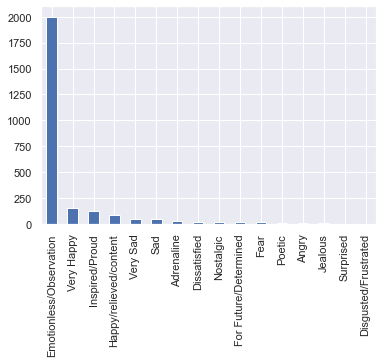

In [21]:
preds.primary_emotion_hat.value_counts().plot.bar()

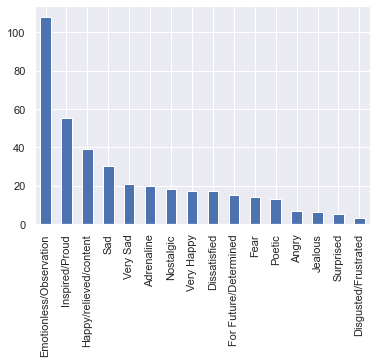

In [22]:
labelled.primary_emotion.value_counts().plot.bar()

In [23]:
# which tags go together ? What's the relationship? #read the UCSD paper in research folder

In [24]:
labels = labelled[['emotion']]
labels = pd.DataFrame(labels.emotion.to_list())
labels = labels.melt()
labels

,variable,value
0,0,9.0
1,0,9.0
2,0,9.0
3,0,9.0
4,0,9.0
...,...,...
2711,6,NaN
2712,6,NaN
2713,6,NaN
2714,6,NaN


In [25]:
# sns.set(style="white")
# mask = np.triu(np.ones_like(labels.corr(), dtype=np.bool))
# sns.heatmap(labels.corr(), cmap = sns.diverging_palette(10,240, as_cmap=True), mask=mask,center=0)

In [26]:
# for each_column in labels.columns:
#     plt.figure(figsize=(20,10))
# #     plt.xticks(ticks=list(range(1,17)))
#     sns.boxenplot(labels[[each_column]])
#     plt.legend()

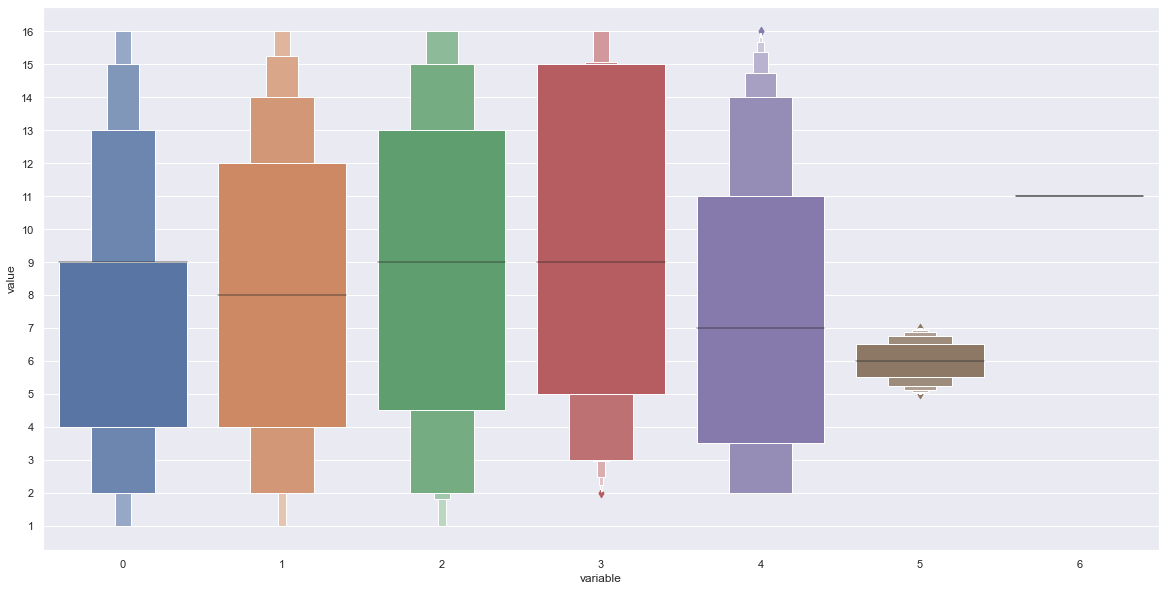

In [27]:
plt.figure(figsize=(20,10))
plt.yticks(ticks=list(range(1,17)))
sns.boxenplot(labels.variable, labels.value)

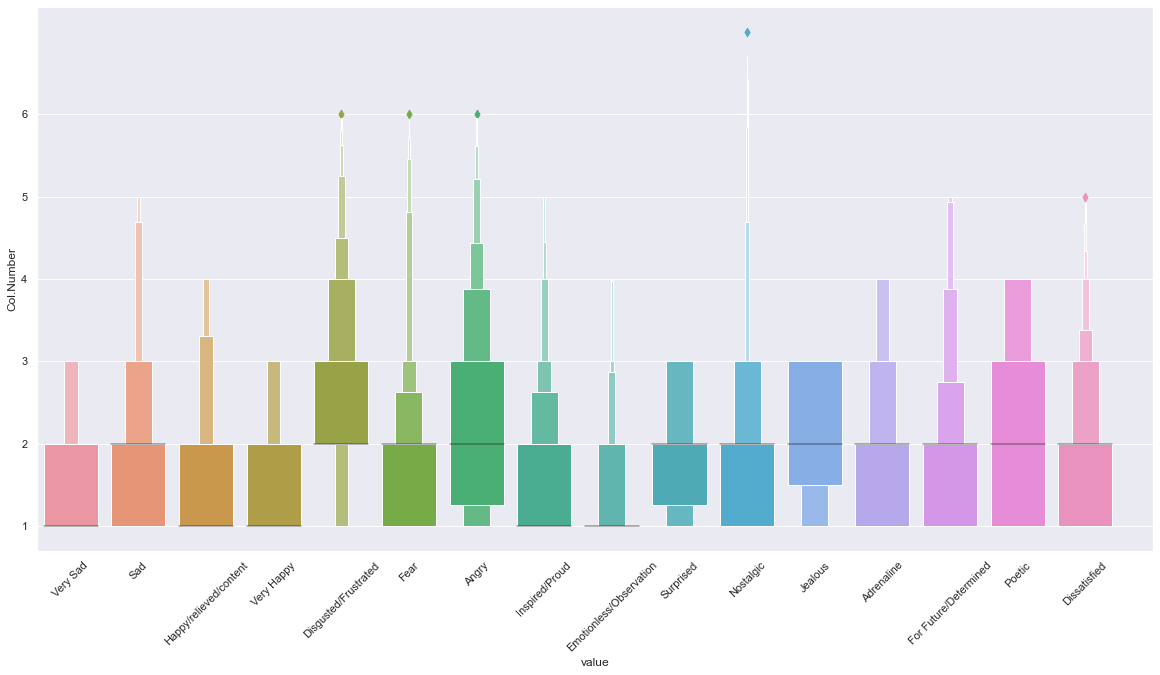

In [28]:
plt.figure(figsize=(20,10))
plt.yticks(ticks=list(range(0,6)),labels=list(range(1,7)))
sns.boxenplot(labels.value,labels.variable)
plt.xticks(ticks=list(range(0,17)),labels=[str(mapper(x)) for x in range(1,17)], rotation=45)
plt.ylabel('Col.Number')
# plt.savefig(f'Figures saved from analyses/Emotion Vs Layer Number ({len(labelled)} labels).png')
plt.show()

In [29]:
# sentiment over time

In [35]:
def valence(label):
    dct = {
        0:0,
        1: -2,
        2 : -1,
        3 : 1,
        4 : 2,
        5 : -1,
        6 : -1,
        7 : -1,
        8 : 1,
        9 : 0,
        10: 0.5,
        11  :-0.5,
        12 :-1,
        13:  0.25,
        14 : 0.25,
        15 : 0.1,
        16 : -1
    }
    return(dct[label])

In [39]:
labelled['valence'] = [sum([valence(each_element) for each_element in each_list]) for each_list in labelled.emotion]

In [47]:
# labelled

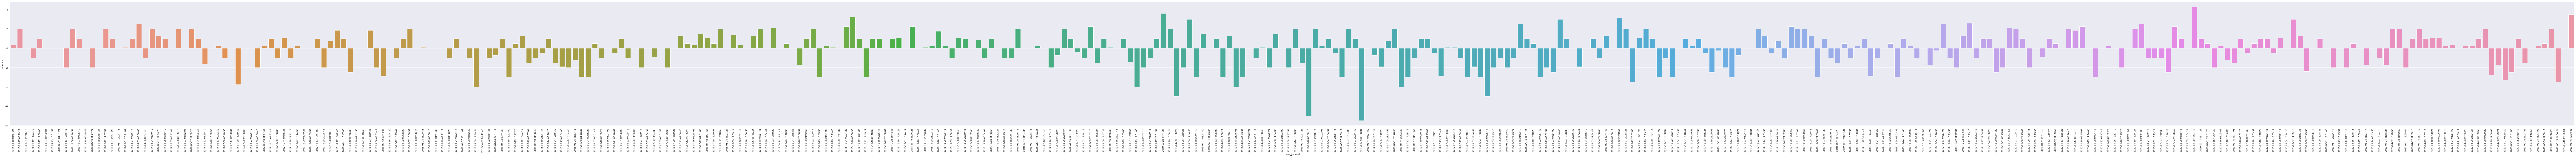

In [48]:
valency_over_time = labelled[['date_journal','valence']].sort_values('date_journal')
plt.figure(figsize=(200,10))
sns.barplot(valency_over_time.date_journal,valency_over_time.valence)
plt.xticks(rotation=90)
# plt.savefig(f'Figures saved from analyses/Labelled_Sentiments_Vs_Time({len(labelled)} labels).png')
plt.show()